# Professor Ioannis Paraskevopoulos

Python Matrix commands
'''''''''''''''''''''''
Matrix operators in Numpy
matrix() coerces an object into the matrix class.
.T  transposes a matrix.
* or dot(X,Y) is the operator for matrix multiplication (when matrices are 2-dimensional; see here).
.I takes the inverse of a matrix. Note: the matrix must be invertible.

# Symbolic Mathematics

In [25]:
from sympy import Symbol

x, y = Symbol('x'), Symbol('y') # Treat 'x' and 'y' as algebraic symbols


In [26]:
x+x+x+y

3*x + y

In [27]:
expression = (x + y)**2
expression.expand()


x**2 + 2*x*y + y**2

In [28]:
from sympy import solve

solve(x**2 + x + 2)


[-1/2 - sqrt(7)*I/2, -1/2 + sqrt(7)*I/2]

In [29]:
from sympy import limit, sin, diff


limit(1 / x, x, 0)


limit(sin(x) / x, x, 0)



1

In [30]:
diff(sin(x), x)

cos(x)

In [31]:
df.mean()

price    -0.626768
weight    1.143859
dtype: float64

# Statistical Models

Statsmodel is a Python library designed for more statistically-oriented approaches to data analysis, with an emphasis on econometric analyses. It integrates well with the pandas and numpy libraries we covered in a previous post. It also has built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. Scikit-learn also has support for linear regression, including many forms of regularized regression lacking in statsmodels, but it lacks the rich set of statistical tests and diagnostics that have been developed for linear models.

Linear regression one of the simplest and most commonly used modeling techniques. It makes very strong assumptions about the relationship between the predictor variables (the X) and the response (the Y). It assumes that this relationship takes the form:

$$y=\beta_{0}+\beta_{1}∗x$$
Ordinary Least Squares is the simplest and most common estimator in which the two $\beta$ s are chosen to minimize the square of the distance between the predicted values and the actual values. Even though this model is quite rigid and often does not reflect the true relationship, this still remains a popular approach for several reasons. For one, it is computationally cheap to calculate the coefficients. It is also easier to interpret than more sophisticated models, and in situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\hat{y}=\hat{\beta_{0}}+\hat{\beta_{1}}∗x$$
Here the hats on the variables represent the fact that they are estimated from the data we have available. The $\beta$ s are termed the parameters of the model or the coefficients. β0 is called the constant term or the intercept.

In [3]:
# load numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# load statsmodels as alias ``sm``
import statsmodels.api as sm

# load the longley dataset into a pandas data frame - first column (year) used as row labels
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

GNP.deflator      GNP  Unemployed  Armed.Forces  Population  Year  \
1947          83.0  234.289       235.6         159.0     107.608  1947   
1948          88.5  259.426       232.5         145.6     108.632  1948   
1949          88.2  258.054       368.2         161.6     109.773  1949   
1950          89.5  284.599       335.1         165.0     110.929  1950   
1951          96.2  328.975       209.9         309.9     112.075  1951   

      Employed  
1947    60.323  
1948    61.122  
1949    60.171  
1950    61.187  
1951    63.221

In [5]:
y = df.Employed  # response
X = df.GNP  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const      GNP
1947      1  234.289
1948      1  259.426
1949      1  258.054
1950      1  284.599
1951      1  328.975

1947    234.289
1948    259.426
1949    258.054
1950    284.599
1951    328.975
1952    346.999
1953    365.385
1954    363.112
1955    397.469
1956    419.180
1957    442.769
1958    444.546
1959    482.704
1960    502.601
1961    518.173
1962    554.894
Name: GNP, dtype: float64

In [11]:
est = sm.OLS(y, X)

In [35]:
est = est.fit()
est.summary()

/projects/sage/sage-6.9/local/lib/python2.7/site-packages/scipy/stats/stats.py:1205: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 22 Oct 2015   Prob (F-statistic):           8.36e-12
Time:                        14:45:19   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000        50.382    53.305
GNP            0.0348      0.002     20.374      0.000         0.031     0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
est.params

AttributeError: 'OLS' object has no attribute 'params'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


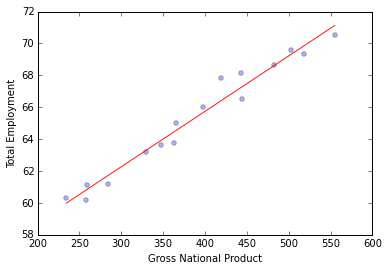

In [37]:
# Make sure that graphics appear inline in the iPython notebook
%pylab inline

# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [38]:
#import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictors
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 22 Oct 2015   Prob (F-statistic):           8.36e-12
Time:                        14:45:20   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000        50.382    53.305
GNP            0.0348      0.002     20.374      0.000         0.031     0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

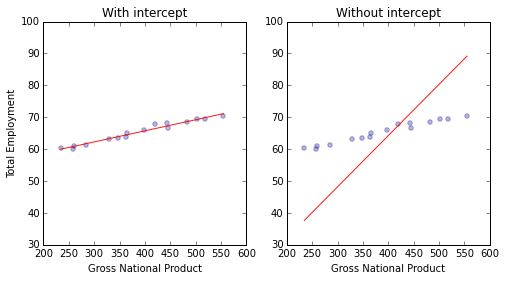

In [39]:
# Fit the no-intercept model
est_no_int = smf.ols(formula='Employed ~ GNP - 1', data=df).fit()

# We pick 100 hundred points equally spaced from the min to the max
X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_prime_1 = sm.add_constant(X_prime_1)  # add constant as we did before

y_hat_int = est.predict(X_prime_1)
y_hat_no_int = est_no_int.predict(X_prime_1)

fig = plt.figure(figsize=(8,4))
splt = plt.subplot(121)

splt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.ylim(30, 100)  # Set the y-axis to be the same
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.title("With intercept")
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9)  # Add the regression line, colored in red

splt = plt.subplot(122)
splt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.title("Without intercept")
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9)  # Add the regression line, colored in red

In [46]:
import numpy as np
import pysal

In [42]:
db = pysal.open(pysal.examples.get_path('columbus.dbf'),'r')

Extract the HOVAL column (home values) from the DBF file and make it the dependent variable for the regression. Note that PySAL requires this to be an nx1 numpy array.

In [43]:
hoval = db.by_col("HOVAL")
y = np.array(hoval)
y.shape = (len(hoval), 1)

Extract CRIME (crime) and INC (income) vectors from the DBF to be used as independent variables in the regression. Note that PySAL requires this to be an nxj numpy array, where j is the number of independent variables (not including a constant). pysal.spreg.OLS adds a vector of ones to the independent variables passed in.

In [44]:
X = []
X.append(db.by_col("INC"))
X.append(db.by_col("CRIME"))
X = np.array(X).T

In [48]:
ols = pysal.spreg.OLS(y, X, name_y='home value', name_x=['income','crime'], name_ds='columbus', white_test=True)

In [50]:
ols.betas

array([[ 46.42818268],
       [  0.62898397],
       [ -0.48488854]])

In [51]:
print round(ols.t_stat[2][0],3)
print round(ols.t_stat[2][1],3)
print round(ols.r2,3)

-2.654
0.011
0.35


In [52]:
ols.summary

'REGRESSION\n----------\nSUMMARY OF OUTPUT: ORDINARY LEAST SQUARES\n-----------------------------------------\nData set            :    columbus\nDependent Variable  :  home value                Number of Observations:          49\nMean dependent var  :     38.4362                Number of Variables   :           3\nS.D. dependent var  :     18.4661                Degrees of Freedom    :          46\nR-squared           :      0.3495\nAdjusted R-squared  :      0.3212\nSum squared residual:   10647.015                F-statistic           :     12.3582\nSigma-square        :     231.457                Prob(F-statistic)     :   5.064e-05\nS.E. of regression  :      15.214                Log likelihood        :    -201.368\nSigma-square ML     :     217.286                Akaike info criterion :     408.735\nS.E of regression ML:     14.7406                Schwarz criterion     :     414.411\n\n------------------------------------------------------------------------------------\n        

If the optional parameters w and spat_diag are passed to pysal.spreg.OLS, spatial diagnostics will also be computed for the regression. These include Lagrange multiplier tests and Moran’s I of the residuals. The w parameter is a PySAL spatial weights matrix. In this example, w is built directly from the shapefile columbus.shp, but w can also be read in from a GAL or GWT file. In this case a rook contiguity weights matrix is built, but PySAL also offers queen contiguity, distance weights and k nearest neighbor weights among others. In the example, the Moran’s I of the residuals is 0.204 with a standardized value of 2.592 and a p-value of 0.0095.

In [55]:
w = pysal.weights.rook_from_shapefile(pysal.examples.get_path("columbus.shp"))
ols = pysal.spreg.OLS(y, X, w, spat_diag=True, moran=True, name_y='home value', name_x=['income','crime'], name_ds='columbus')
ols.betas

array([[ 46.42818268],
       [  0.62898397],
       [ -0.48488854]])

In [56]:
print round(ols.moran_res[0],3)

print round(ols.moran_res[1],3)
print round(ols.moran_res[2],4)

0.204
2.592
0.0095
